In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 

## 01- Gini Impurity of a dataset

In [63]:
df=pd.read_csv("Iris.csv")

In [65]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Gini Impurity
Gini Impurity tells us how mixed a group of items is.
It measures the chance that a randomly chosen item from the group would be labeled incorrectly if we guessed its class based on the current class distribution.

### What is happening in our code ( FOR MULTI- CLASS) 

- In my dataset we have three unique labels for 150 rows. Now we want to see " of we randomly pick a flower from our data set , what are the chances that its class or labels will be incorrectly callssifed based on the given condition of data".
####  Gini = 0:
- If we had only 1 type of label of class for whole dataset lets say Iris- Virginica.
- then no what how many times we choose a flower to see what is its label, it will always be correct " Iris- Virginica.
#### Gini = High:
- It we had two types of class labels then the chances of any specific label to come is 50 - 50.
- In this case, the gini impuirty is very  high.
#### Gini= Mixed Case:
- In case where the distribution labels is un even like say more rows has one kind of label, fewer have other class and very few has any other label.
- In this case, we dont know what will be the labels of a data point we chose to predict.
- So we have to manually calculate it to see.

#### Formual:
- The formual for gini impurity is :
- ( 1- ∑ p^2 )
- Where p is the probability.
- and summation means : 1st take square of the probability of total number of classes, then sum them up ,and then substract 1.
- This will give us the total gini impurity.

### Explanation: 
- The code is explained in comments

In [148]:

labels = df['Species'].tolist()   # here we are taking dataframe column species, which contains labels and making a list of it.

# gini impurity calculation
def calculate_gini(labels):  # passing labels list
    total_count = len(labels)   # counting how many unique lables do we have  in lkist.
    class_counts = {}       # making an empty dictionery.
    
    for label in labels:  # we are iterating through the label list.
        if label not in class_counts:   # checking if the label that is in the list exist in disctionary as well.
            class_counts[label] = 0    # if it doesnt exist in dictionery, means  we add its key as 0.  liek { iris - virginica : 0}, now that it has 
                                      # encountered it for the first time, increment it by 1 in next step.
        class_counts[label] += 1    #  Let's say for second iteration we have got virginica again. as its already in the list, so we will directly 
                                   # increment it by 1 instead doing the above step.
  
    gini = 1.0    # intitially assigning gini as 1 , because the maximum value we can get for it is 1, so we will substract the proprtions sum from it.
    for count in class_counts.values():  # we are only getting key values from the class_count dictionay that we craeted in above step 
                                         # lets say class count dictioanry looks like this { Iris- virginia : 50, Iris setosa : 50 } then .values gives us
                                           # [ 50, 50]
        
        proportion = count / total_count    # this will do 50/150 ,    150 is the total count we took in start 
        gini -= proportion ** 2  # taking square of proprtion and substracting 1 
    
    return gini # returning gini

gini_impurity = calculate_gini(labels)
print("Gini Impurity of the full dataset:", gini_impurity)



Gini Impurity of the full dataset: 0.6666666666666665


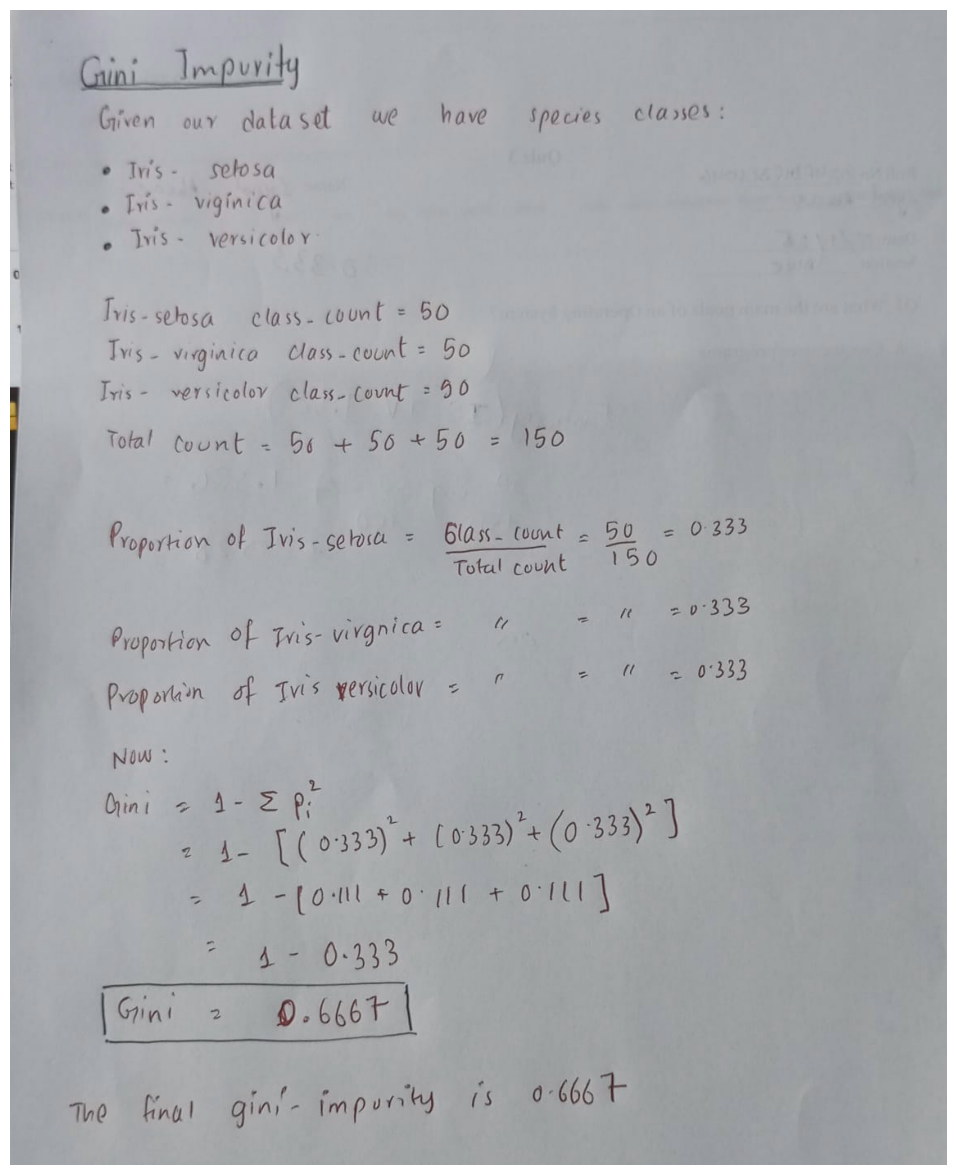

In [192]:
pic=cv2.imread(r"C:\Users\PMLS\Desktop\gini_sir_inam_lab.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(pic)
plt.axis('off')  
plt.show()


## For a binary class dataset:


In [85]:
titanic=pd.read_csv(r"C:\Users\PMLS\Downloads\titanic_clean.csv")
titanic.head(5)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [87]:
labels = titanic['survived'].tolist()  

def calculate_gini(labels):  
    total_count = len(labels)   
    class_counts = {}        
    for label in labels:  
        if label not in class_counts:  
            class_counts[label] = 0                                
        class_counts[label] += 1    
                                 
    gini = 1.0    
    for count in class_counts.values(): 
                                           
        proportion = count / total_count   
        gini -= proportion ** 2  
    
    return gini

gini_impurity = calculate_gini(labels)
print("Gini Impurity of the full dataset:", gini_impurity)

Gini Impurity of the full dataset: 0.4729433016723968


### Visualizing usings bar graph

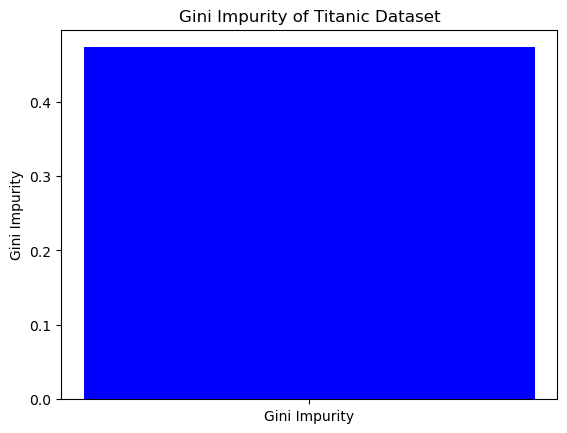

Gini Impurity of the full dataset: 0.4729433016723968


In [176]:
import matplotlib.pyplot as plt

# Calculate Gini impurity for your dataset
labels = titanic['survived'].tolist()
gini_impurity = calculate_gini(labels)

# Plot a single value (the Gini impurity of the dataset)
plt.bar(['Gini Impurity'], [gini_impurity], color='blue')
plt.ylabel('Gini Impurity')
plt.title('Gini Impurity of Titanic Dataset')
plt.show()

# Print the result
print("Gini Impurity of the full dataset:", gini_impurity)


### Conclusion:
- The reason we are getting lower gini impurity of 0.472 is beacause we have only 2 classes in this dataset.
- In previous the dataset had three classes and on top of that balanced, therefore for thsi we have only 2 classes which makes the impurity smaller.

## 02- Entropy For Set Of Labels


#### Entropy Tells Us About Disorder:
- Entropy measures the degree of disorder or impurity in a dataset.
- The more mixed or uncertain the dataset is ( the more classes or labels are spread out evenly), the higher the entropy.
- If the data is pure (meaning almost all instances belong to one class), the entropy is low.

####  More Classes = Higher Disorder:
- If our dataset has more classes, there is more uncertainty about the class of a given instance.
- The entropy value increases as the number of equally probable classes increases.
- for example: A dataset with 3 classes ( Iris-setosa, Iris-versicolor, and Iris-virginica) will have a higher entropy compared to a dataset with only 2 classes.

#### Fewer Classes = Lower Disorder:
- When there are fewer classes, the dataset is more predictable. Therefore, the entropy is lower.
- for example :  If you only have one class in the dataset, entropy will be zero because there’s no uncertainty.

#### Only 1 Class = Minimum Entropy (0):
- If all instances belong to one class, there’s no uncertainty, so the entropy is at its minimum value of 0.
- forr exxample: If a dataset only contains Iris-setosa and no other species, the entropy is zero because there’s no variation—every instance belongs to the same class.

In [43]:
import math # importing match library to take log.


def calculate_entropy(labels):
    total_count = len(labels)  # getting the total number of labels
    class_counts = labels.value_counts()  #getting the  the count of each class
    
    entropy = 0.0
    for count in class_counts:
        proportion = count / total_count  # calculating the proroportion of each class
        entropy -= proportion * math.log2(proportion)  # calculate entropy
    
    return entropy

# loading the sepcies column from our df to lables variables
labels = df['Species']

# calling the function an storing the result that it returns in " enytropy species" 
entropy_species = calculate_entropy(labels)
print("Entropy for 'Species':", entropy_species)


Entropy for 'Species': 1.584962500721156


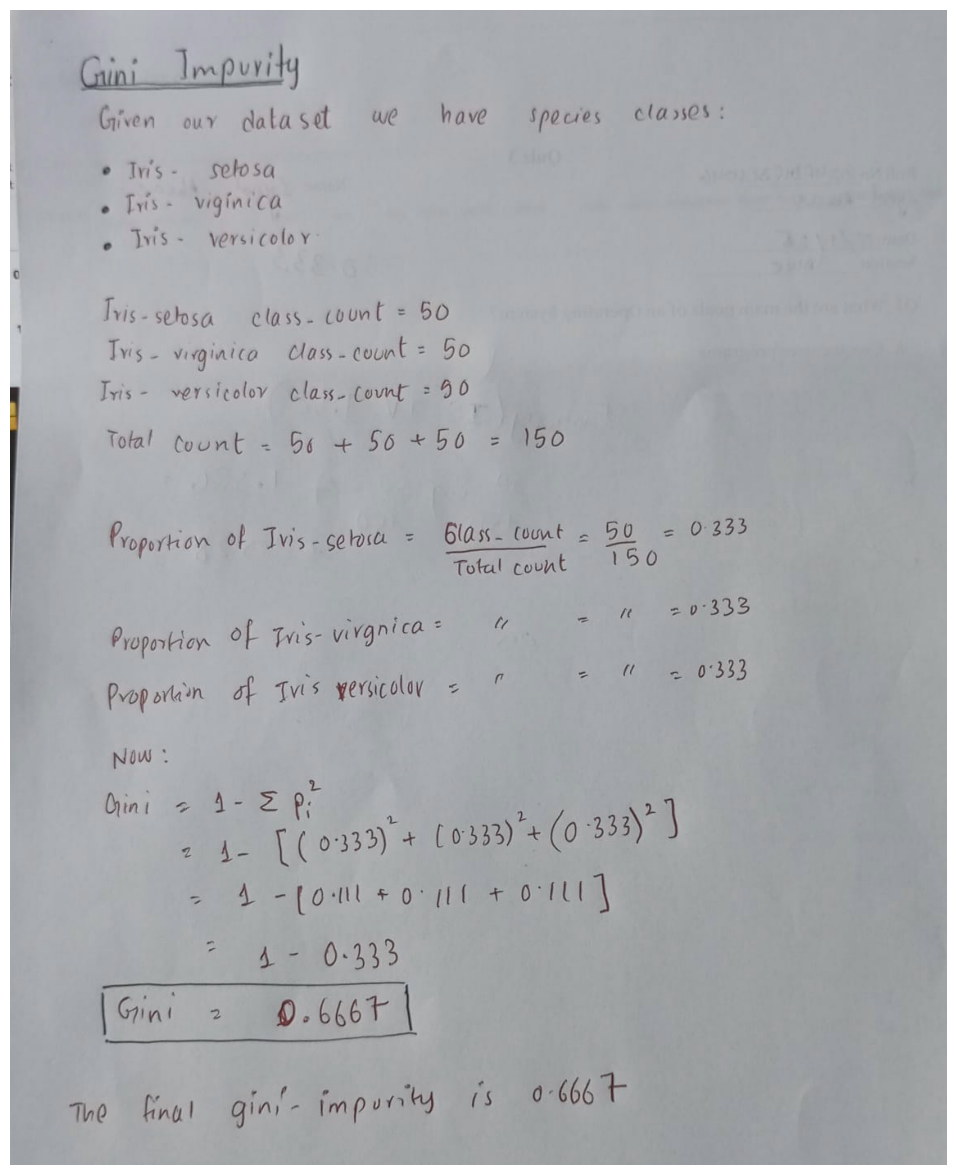

In [196]:
pic=cv2.imread(r"C:\Users\PMLS\Desktop\gini_sir_inam_lab.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(pic)
plt.axis('off')  
plt.show()


### For Binary class

In [92]:
import math # importing match library to take log.


def calculate_entropy(labels):
    total_count = len(labels)  # getting the total number of labels
    class_counts = labels.value_counts()  #getting the  the count of each class
    
    entropy = 0.0
    for count in class_counts:
        proportion = count / total_count  # calculating the proroportion of each class
        entropy -= proportion * math.log2(proportion)  # calculate entropy
    
    return entropy

# loading the sepcies column from our df to lables variables
labels = titanic['survived']

# calling the function an storing the result that it returns in " enytropy species" 
entropy_survived = calculate_entropy(labels)
print("Entropy for 'Species':", entropy_survived)

Entropy for 'Species': 0.9597906610024309


### Conclusion:
- For the previous dataset, we had an entropy greater than 1, while for the Titanic dataset, we have an entropy of 0.95.
- We know that for 2 classes, the entropy will always be less than 1, and in this case, we have only "survived" and "not survived."
- If all instances were either "survived" or "not survived," the dataset would be pure, and there would be no impurity (entropy = 0).
- But in this case, with an entropy of 0.95, it means that both classes are relatively balanced, with neither class dominating the other too much. This suggests that the data is fairly balanced, but not perfectly.

## 03- Implement PCA to reduce the dimensions of the dataset.

- We will PCA on the titanic dataset.
- We loaded the dataset into variable data.
- Then those columns which are  all textual columns or identifiers that don't contribute to numerical analysis, so they are removed.
- The drop() method returns a new DataFrame (data_cleaned) with the specified columns removed.
- subset=numeric_columns: itt specifies that only rows with missing values in the columns listed in numeric_columns will be dropped.
- so the data cleaned now contains only non-numeric rows.

In [119]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

data=pd.read_csv(r"C:\Users\PMLS\Downloads\titanic_clean.csv")

# Drop irrelevant columns (like identifiers and text-based columns)
data_cleaned = data.drop(columns=['Unnamed: 0', 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest', 'has_cabin_number'])
# Drop rows with missing values in the relevant columns
data_cleaned = data_cleaned.dropna(subset=numeric_columns)

# Check the cleaned data
print(data_cleaned[numeric_columns].head())



   pclass      age  sibsp  parch      fare     sex embarked
0     1.0  29.0000    0.0    0.0  211.3375  female        S
1     1.0   0.9167    1.0    2.0  151.5500    male        S
2     1.0   2.0000    1.0    2.0  151.5500  female        S
3     1.0  30.0000    1.0    2.0  151.5500    male        S
4     1.0  25.0000    1.0    2.0  151.5500  female        S


- We have some columns in the data that are categorical (non-numeric), such as sex (male/female) and embarked (the ports the passengers embarked from, like S, C, Q). These are the columns that help in analysis .
- The reason why we dropped other textual columns like name etc is because there is no specific encoding for it. Like how many names can we encode? - - - Thats why we dropped those textual columns.
- But sex can be encodd as either 0 for male, or 1 for female like wise.
- These values are textual (e.g., "male", "female", "S", "C"), but machine learning models can’t work with text directly; they need numbers.
- So, Label Encoding is the process where we convert these text values into numerical values

In [121]:

label_encoders = {}
for column in ['sex', 'embarked']:
    label_encoders[column] = LabelEncoder()
    data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])

print(data_cleaned.head())


   pclass  survived  sex      age  sibsp  parch      fare  embarked
0     1.0       1.0    0  29.0000    0.0    0.0  211.3375         2
1     1.0       1.0    1   0.9167    1.0    2.0  151.5500         2
2     1.0       0.0    0   2.0000    1.0    2.0  151.5500         2
3     1.0       0.0    1  30.0000    1.0    2.0  151.5500         2
4     1.0       0.0    0  25.0000    1.0    2.0  151.5500         2


- We defined the numeric_columns: These are the columns that contain numerical values which are important for our analysis, like:
- pclass (Passenger Class)

- age (Age of passengers)

- sibsp (Number of siblings/spouses aboard)

- parch (Number of parents/children aboard)

- fare (Ticket fare)

- sex and embarked (which were previously encoded as numbers)

- scaler = StandardScaler() creates an object of StandardScaler, which will be used to standardize (scale) our data.
- This is done because different numerical columns like age, fare  may have very different ranges. For example, age could range from 0 to 80, while fare could range from 0 to 500. This can make some features dominate the model's calculations because they have larger ranges.
- So, scaling adjusts all the numerical values in each column to have:
- Mean of 0 (average value is 0)

- Standard deviation of 1 (spread of the values is consistent)
- fit_transform means it first learns the mean and standard deviation of each column and then transforms the data to be standardized based on those values.
- So, scaling makes sure that all the numerical features are on the same scale and can be compared more effectively in the model.

In [133]:

numeric_columns = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex', 'embarked']
scaler = StandardScaler()
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])




##### pca = PCA(n_components=3):
- We are  creating a PCA (Principal Component Analysis) object.
- n_components=3 means we want to reduce the data to 3 main components (new features). This will make the data simpler while still retaining as much important information as possible.

##### pca_result = pca.fit_transform(data_cleaned[numeric_columns]):
- fit_transform is applied to the data.
- This means the PCA algorithm is being "trained" on the data to find the 3 most important components that represent the data.
- It then transforms the original data into these 3 new components, creating a simpler version of the dataset.

##### pca_df = pd.DataFrame(data=pca_result, columns=['pc1', 'pc2', 'pc3']):
- The results of the PCA (the 3 new components) are stored in a new DataFrame (pca_df).
- Each of the 3 new components is given a name: 'pc1', 'pc2', 'pc3'.

##### explained_variance_ratio = pca.explained_variance_ratio_:
- This line gets the "explained variance" for each of the 3 principal components.
- It tells us how much of the original data's variation (or spread) is captured by each of the new components.
- for example, if PC1 captures 60% of the variance, it means PC1 represents most of the important patterns in the data.

##### print("Explained Variance Ratios:", explained_variance_ratio):
- This prints out the explained variance ratios for each of the 3 components. It shows how much each of the new components explains about the original data.

##### print(pca_df.head()):
- Finally, this prints the first few rows of the new DataFrame (pca_df) that contains the 3 new components. This shows the transformed data in terms of the principal components (pc1, pc2, and pc3).



In [136]:

pca = PCA(n_components=3)  
pca_result = pca.fit_transform(data_cleaned[numeric_columns])

pca_df = pd.DataFrame(data=pca_result, columns=['pc1', 'pc2', 'pc3'])

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

print(pca_df.head())


Explained Variance Ratios: [0.27398    0.23351714 0.13892362]
        pc1       pc2       pc3
0  2.994642  0.042444  0.259821
1  1.517116  2.086140  0.829424
2  2.089913  2.688526 -0.050466
3  2.232499  1.141351  1.728752
4  2.655661  1.941356  0.660751


### Conclusion:
These numbers represent how much information or "variance" each principal component (PC1, PC2, PC3) captures from the original dataset.

- PC1 (First Principal Component) captures 27.4% of the data's variance.

- PC2 (Second Principal Component) captures 23.4% of the variance.

- PC3 (Third Principal Component) captures 13.9% of the variance.

The higher the percentage, the more important that component is for explaining the data. In this case, PC1 captures the most, followed by PC2, and then PC3.

